In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import re
from urllib.parse import urlparse

In [2]:
data = pd.read_csv('../native_ad_data.csv')

Let's start with a littler data cleanup: stripdown dates

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data['date'].dtype

dtype('<M8[ns]')

In [5]:
data = data.set_index('date')

In [6]:
data['date'] = data.index.date

In [7]:
data.head()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date
date,,,,,,,,,,
2017-03-27 12:59:09.279,ObjectId(58d90ce706e10d04f7e1b3d8),20 Cool Moments From Joe Biden’s Time In Office,http://scribol.com/a/news-and-politics/ways-jo...,https://console.brax-cdn.com/creatives/98c6400...,taboola,http://tmz.com,./imgs/876aa5e83f6fb81a81908db3c02fdcc00d44400...,http://scribol.com/a/news-and-politics/ways-jo...,NaN,2017-03-27
2017-03-27 12:59:09.819,ObjectId(58d90ce706e10d04f7e1b3d9),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27
2017-03-27 12:59:10.750,ObjectId(58d90ce706e10d04f7e1b3da),It's Almost Hard To Fathom What He look's Like...,http://www.journalistate.com/popular/big-holly...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/feeb5be5a9758fcca8cef21b6fb842ccc839476...,http://www.journalistate.com/popular/big-holly...,NaN,2017-03-27
2017-03-27 12:59:11.430,ObjectId(58d90ce706e10d04f7e1b3db),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27
2017-03-27 12:59:11.510,ObjectId(58d90ce706e10d04f7e1b3dc),Try NOT Gasp When You See Who Queen Latifah Is...,http://zcretuzft.iflmylife.com/entertainment/o...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/d75401b962746864063b51f164633ffeb93931d...,http://www.iflmylife.com/entertainment/other-h...,NaN,2017-03-27


The one's from zergnet all have some newlines we need to get rid of and they appear to have concatenated the headline with the provider. So let's clean those up.

In [8]:
data['headline'] = data['headline'].apply(lambda x: re.sub('(?<=[a-z])\.?([A-Z](.*))' , '', x.strip()))
data.head()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date
date,,,,,,,,,,
2017-03-27 12:59:09.279,ObjectId(58d90ce706e10d04f7e1b3d8),20 Cool Moments From Joe Biden’s Time In Office,http://scribol.com/a/news-and-politics/ways-jo...,https://console.brax-cdn.com/creatives/98c6400...,taboola,http://tmz.com,./imgs/876aa5e83f6fb81a81908db3c02fdcc00d44400...,http://scribol.com/a/news-and-politics/ways-jo...,NaN,2017-03-27
2017-03-27 12:59:09.819,ObjectId(58d90ce706e10d04f7e1b3d9),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27
2017-03-27 12:59:10.750,ObjectId(58d90ce706e10d04f7e1b3da),It's Almost Hard To Fathom What He look's Like...,http://www.journalistate.com/popular/big-holly...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/feeb5be5a9758fcca8cef21b6fb842ccc839476...,http://www.journalistate.com/popular/big-holly...,NaN,2017-03-27
2017-03-27 12:59:11.430,ObjectId(58d90ce706e10d04f7e1b3db),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27
2017-03-27 12:59:11.510,ObjectId(58d90ce706e10d04f7e1b3dc),Try NOT Gasp When You See Who Queen Latifah Is...,http://zcretuzft.iflmylife.com/entertainment/o...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/d75401b962746864063b51f164633ffeb93931d...,http://www.iflmylife.com/entertainment/other-h...,NaN,2017-03-27


In [9]:
data['headline']

date
2017-03-27 12:59:09.279      20 Cool Moments From Joe Biden’s Time In Office
2017-03-27 12:59:09.819     Troubled News Anchor Does The Unthinkable On Air
2017-03-27 12:59:10.750    It's Almost Hard To Fathom What He look's Like...
2017-03-27 12:59:11.430     Troubled News Anchor Does The Unthinkable On Air
2017-03-27 12:59:11.510    Try NOT Gasp When You See Who Queen Latifah Is...
2017-03-27 12:59:12.607    After Losing 101lbs Susan Boyle Looks Like A M...
2017-03-27 12:59:12.848    Try NOT Gasp When You See Who Queen Latifah Is...
2017-03-27 12:59:12.984     Tiffany Trump Can't Hide From The Rumors Anymore
2017-03-27 12:59:13.038         25 Pics Donald Trump Doesn't Want You To See
2017-03-27 12:59:14.659    21 Disturbing Secrets The Obama's Tried To Hid...
2017-03-27 12:59:15.114    Do This Tonight to Make Fungus Disappear by Mo...
2017-03-27 12:59:15.237    Here's What New Dental Implants Should Cost Yo...
2017-03-27 12:59:15.614    Michael Jordan Has Pretty Much Given Up on H

OK, that's better.

Do we have any null values?

In [10]:
for col in data.columns:
    print((col, sum(data[col].isnull())))

('_id', 0)
('headline', 0)
('link', 0)
('img', 0)
('provider', 0)
('source', 0)
('img_file', 315)
('final_link', 0)
('orig_article', 59776)
('date', 0)


For future reference, we have a small number of img_files that are null (probably because the scraper errored out grabbing the file). For the most part, that's pretty good.

In [11]:
data.describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date
count,129399,129399,129399,129399,129399,129399,129084,129399,69623,129399
unique,129399,18022,43315,23843,4,24,24514,36713,6670,93
top,ObjectId(5940988e9e1e2a1a29826874),Here’s Why Guys Are Obsessed With This Underwear…,https://grizly.com/lifestyle/guy-turned-backya...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,db07ff3401037653d665822c5a78617464fe4ef8.jpg,https://grizly.com/lifestyle/guy-turned-backya...,http://www.tmz.com/2017/06/02/kathy-griffin-co...,2017-06-24
freq,1,996,588,621,59474,24167,586,588,167,3125


Already we can see some interesting trends here. Out of 64147 unique records, only 10260 of the headlines are unique, but 19212 of the links are unique and 12709 of the image files are unique (assuming for sure that there were issues with downloading images, but more on that later). So it seems already that there are content links which might reuse the same headline, or image for different destination articles. Let's try to dig into that.

Also, becuase we want to inspect the hosts from which the articles and images are coming from, let's parse those out in the data.

In [12]:
data['img_host'] = data['img'].apply(lambda x: urlparse(x).netloc)

In [13]:
data['link_host'] = data['final_link'].apply(lambda x: urlparse(x).netloc)

In [14]:
data.head()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host
date,,,,,,,,,,,,
2017-03-27 12:59:09.279,ObjectId(58d90ce706e10d04f7e1b3d8),20 Cool Moments From Joe Biden’s Time In Office,http://scribol.com/a/news-and-politics/ways-jo...,https://console.brax-cdn.com/creatives/98c6400...,taboola,http://tmz.com,./imgs/876aa5e83f6fb81a81908db3c02fdcc00d44400...,http://scribol.com/a/news-and-politics/ways-jo...,NaN,2017-03-27,console.brax-cdn.com,scribol.com
2017-03-27 12:59:09.819,ObjectId(58d90ce706e10d04f7e1b3d9),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27,console.brax-cdn.com,www.trend-chaser.com
2017-03-27 12:59:10.750,ObjectId(58d90ce706e10d04f7e1b3da),It's Almost Hard To Fathom What He look's Like...,http://www.journalistate.com/popular/big-holly...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/feeb5be5a9758fcca8cef21b6fb842ccc839476...,http://www.journalistate.com/popular/big-holly...,NaN,2017-03-27,cdn.taboolasyndication.com,www.journalistate.com
2017-03-27 12:59:11.430,ObjectId(58d90ce706e10d04f7e1b3db),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27,console.brax-cdn.com,www.trend-chaser.com
2017-03-27 12:59:11.510,ObjectId(58d90ce706e10d04f7e1b3dc),Try NOT Gasp When You See Who Queen Latifah Is...,http://zcretuzft.iflmylife.com/entertainment/o...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/d75401b962746864063b51f164633ffeb93931d...,http://www.iflmylife.com/entertainment/other-h...,NaN,2017-03-27,cdn.taboolasyndication.com,www.iflmylife.com


We're working with a lot of duplicates, I'm sure. Let's remove anything where the headline, link, img, provider, source, img_file, final_link are the same. This should only give us back the unique records we're looking for.

In [15]:
deduped = data.drop_duplicates(subset=['headline', 'link', 'img', 'provider', 'source', 'img_file', 'final_link', 'orig_article'], keep=False)

In [16]:
deduped.describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host
count,82376,82376,82376,82376,82376,82376,82197,82376,62973,82376,82376,82376
unique,82376,16946,39564,22225,4,24,22700,34361,6669,93,589,2239
top,ObjectId(5929a14b9e1e2a07340e3fb8),25 Makeup Tips All Older Women Should Know,https://grizly.com/lifestyle/guy-turned-backya...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,f18167ca58fee4ae691a28ecd39b0c1afe2689e4.jpg,https://grizly.com/lifestyle/guy-turned-backya...,http://www.tmz.com/2017/06/02/kathy-griffin-co...,2017-06-20,images.outbrain.com,www.zergnet.com
freq,1,414,292,368,33636,10802,368,292,88,2696,22566,10485


And let's just check on those null values again...

In [17]:
for col in deduped.columns:
    print((col, sum(deduped[col].isnull())))

('_id', 0)
('headline', 0)
('link', 0)
('img', 0)
('provider', 0)
('source', 0)
('img_file', 179)
('final_link', 0)
('orig_article', 19403)
('date', 0)
('img_host', 0)
('link_host', 0)


only 0.2% of images are not available. I think that's ok, It's possible, since we have the original URL, that we might be able to go back and grab them.

Just to be sure it's doing what we assume it's doing, let's just remove duplicates based on headline. I assume this would leave us with far less records as I don't doubt that the same headline migh appear on another website.

In [18]:
deduped_hl = data.drop_duplicates(subset=['headline'], keep=False)

In [19]:
deduped_hl.describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host
count,8466,8466,8466,8466,8466,8466,8435,8466,4509,8466,8466,8466
unique,8466,8466,7787,8036,4,24,8022,7793,2135,93,400,1601
top,ObjectId(594954bc9e1e2a33f6e31d07),Few Americans can Ace This Geography Quiz - Ca...,http://advertisementfeature.cnn.com/2017/yanmar,http://cdn.taboolasyndication.com/libtrc/stati...,outbrain,http://www.politico.com/magazine/,42e88ba4c1e41b38af84e509ce0c476c88d5d139.jpg,http://www.homeadvisor.com/?utm_source=Outbrain,http://www.businessinsider.com/dave-mcclure-no...,2017-07-01,images.outbrain.com,www.zergnet.com
freq,1,1,9,8,4166,1347,7,10,28,264,4168,884


And sure enought we're only left with 4999 records if we only want records with unique headlines.

In [20]:
deduped_hl_source = data.drop_duplicates(subset=['headline', 'source'], keep=False)

In [21]:
deduped_hl_source.describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host
count,13270,13270,13270,13270,13270,13270,13218,13270,7028,13270,13270,13270
unique,13270,11376,11438,11527,4,24,11552,11450,2979,93,526,1814
top,ObjectId(594954bc9e1e2a33f6e31d07),5 Steps To Raising A Viking Child,https://ad.doubleclick.net/ddm/trackclk/N6296....,https://pgeveryday-com.secure.footprint.net/As...,taboola,http://www.politico.com/magazine/,3eb010de91992198e659b635197022e807959e0f.jpg,https://www.verizon.com/home/fios-gigabit-conn...,http://www.businessinsider.com/dave-mcclure-no...,2017-07-01,images.outbrain.com,www.zergnet.com
freq,1,6,21,9,6218,1550,9,21,41,392,5815,980


But that's enough of that. Let's return to the unique records we're interested in in `deduped`. But first, let's take a look at the rate of success for our record collection.

In [22]:
(19131/64147)*100

29.823686220711803

Crud, doing a harvest yields results where only 30% of our sample is worth examining further. By projection, if we wanted to examine ~100,000 unique records, we're going to have to collect ~340000 records. At this rate, that's still some time away. But let's have our anlysis framework ready for that time.

Note: We might still be interested in the duplicates if we take a look at the distribution of those records over time. Below, we should probably reduce the date of collection to a week or maybe a 3 day sequence and only remove duplicates if they happened within that period. Which might tell us something about content being shuffled in and out by the provider.

Let's get the top 10 headlines grouped by img

In [23]:
deduped['headline'].groupby(deduped['img']).value_counts().nlargest(10)

img                                                                                              headline                                                                                                 
http://cdn.taboolasyndication.com/libtrc/static/thumbnails/21a99ebd78f2af61aeeec2074e0376c0.jpg  Nicole Kidman's Yacht Is Far From You'd Expect                                                               368
https://revcontent-p0.s3.amazonaws.com/content/images/1495720487.jpg                             Triple Your Accuracy With This Weird Shooting Technique Used By Seal Snipers                                 238
http://img2.zergnet.com/694817_300.jpg                                                           Kim Kardashian and North West Turn Heads On The Red Carpet                                                   231
http://cdn.taboolasyndication.com/libtrc/static/thumbnails/0dba2430aca9e98e05160cfd6e6d3171.jpg  Here Is How You Upgrade To Business Class                             

In [24]:
deduped['headline'].value_counts().nlargest(10)

25 Makeup Tips All Older Women Should Know                                      414
Here’s Why Guys Are Obsessed With This Underwear…                               377
Nicole Kidman's Yacht Is Far From You'd Expect                                  376
Don't Buy Furniture Until You See This Site                                     322
Triple Your Accuracy With This Weird Shooting Technique Used By Seal Snipers    260
His Neighbors Were Outraged at First. Now They Think He’s a Genius!             256
Kim Kardashian and North West Turn Heads On The Red Carpet                      232
Forget Social Security if you Own a Home (Do This)                              231
Here Is How You Upgrade To Business Class                                       227
Remember Barbi Benton? What She Looks Like Today Is Unreal                      226
Name: headline, dtype: int64

But hang on. let's just see what the top headlines are. There's certainly overlap, but it's not a one to one relationship between headlines and their images (or at least maybe it's the same image, but coming from a different URL).

Note: perhaps something we will want to look into is how many different headline, image permutations there are. I am particularly interested in the reuse of images across different headlines.

In [25]:
deduped['source'].value_counts().nlargest(25)

http://tmz.com                        10802
http://elitedaily.com/                 7378
http://www.breitbart.com               7302
http://thehill.com                     5888
http://www.businessinsider.com/        4559
http://www.politico.com/magazine/      4536
https://www.washingtonpost.com/        4333
http://www.dailymail.co.uk/            4051
http://www.thedailybeast.com/          3776
http://www.rt.com                      3506
http://www.politico.com/politics       3066
http://www.nydailynews.com/news        2897
https://nypost.com/news/               2711
http://www.infowars.com/               2561
https://www.therebel.media/news        2474
https://downtrend.com/                 2421
http://reductress.com/                 2394
http://www.huffingtonpost.com/         2325
http://www.ibtimes.com/                2323
http://observer.com/latest/            1303
http://worldstarhiphop.com/videos/     1292
http://gothamist.com/news               334
http://preventionpulse.com/     

Whoops, if you notice, there are some sites missing here. Because of the inconsistencies in how PhantomJS works, 4 of our sites have not been collected from this entire time (they have been on our local copy).

ok so what are the most frequent images?

In [26]:
IMG_MAX=3

In [27]:
#topimgs_taboola = deduped['img'][deduped['provider'].isin(['taboola'])].value_counts().nlargest(IMG_MAX).index.tolist()

In [28]:
#topimgs_outbrain = deduped['img'][deduped['provider'].isin(['outbrain'])].value_counts().nlargest(IMG_MAX).index.tolist()

In [29]:
#topimgs_zergnet = deduped['img'][deduped['provider'].isin(['zergnet'])].value_counts().nlargest(IMG_MAX).index.tolist()

If we go back to our provider list, we'll notice that there is nothing from revcontent, and this will reflect in that the 4 sites that are missing from our crawl on our server are all revcontent sites. That's annoying.

In [30]:
deduped['provider'].value_counts()

taboola       33636
outbrain      22547
zergnet       17452
revcontent     8741
Name: provider, dtype: int64

In [31]:
#for i in topimgs:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

Great, lets compare them by source.

In [32]:
#for i in topimgs_taboola:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

In [33]:
#for i in topimgs_outbrain:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

In [34]:
#for i in topimgs_zergnet:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

Yawn!!

In [35]:
deduped['link_host'].value_counts().nlargest(25)

www.zergnet.com               10485
trends.revcontent.com          6658
thehill.com                    2377
scribol.com                    1844
www.tmz.com                    1769
www.historyinorbit.com         1277
loanpride.com                   925
www.popoholic.com               904
www.thehollywoodgossip.com      860
www.celebdirtylaundry.com       815
definition.org                  801
search.yahoo.com                743
activly.com                     738
screencrush.com                 737
www.trend-chaser.com            704
www.livingly.com                671
www.kbb.com                     648
mtonews.com                     638
www.nextadvisor.com             613
coed.com                        606
www.thebrofessional.net         585
frank151.com                    566
www.lonny.com                   558
www.lifedaily.com               545
quizzes.howstuffworks.com       540
Name: link_host, dtype: int64

In [36]:
deduped['img_host'].value_counts().nlargest(25)

images.outbrain.com                        22566
cdn.taboolasyndication.com                 15854
revcontent-p0.s3.amazonaws.com              8554
console.brax-cdn.com                        5076
img1.zergnet.com                            4528
img4.zergnet.com                            4302
img5.zergnet.com                            3635
img2.zergnet.com                            3597
prezna.com                                  1507
d2x3bkdslnxkuj.cloudfront.net               1390
cdn.taboola.com                             1369
eam.hexagram.com                             784
prod-cm-minder-uploads.s3.amazonaws.com      761
b1.spassets.com                              711
gleaned-images.stuff.com                     637
s3.amazonaws.com                             533
11001100.s3.amazonaws.com                    423
www.talktechdaily.com                        289
www2.pictures.zimbio.com                     234
proxy.topixcdn.com                           228
www4.pictures.zimbio

In [37]:
dates = deduped['date']

See what dates we're working with

In [38]:
"Start: {}  -  End: {}".format(deduped.index.min(), deduped.index.max())

'Start: 2017-03-27 12:59:09.279000  -  End: 2017-07-09 14:31:10.811000'

In [39]:
deduped = deduped.sort_values('date', ascending=True)

In [40]:
deduped['2017-07-01':'2017-07-07'].describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host
count,10130,10130,10130,10130,10130,10130,10121,10130,10130,10130,10130,10130
unique,10130,2934,5809,3376,4,20,3386,5371,1106,6,162,677
top,ObjectId(595fbe159e1e2a146f6ae36d),Triple Your Accuracy With This Weird Shooting ...,https://grizly.com/lifestyle/guy-turned-backya...,https://revcontent-p0.s3.amazonaws.com/content...,taboola,http://tmz.com,1e3bc2adc7eba5d0f29fff42ff8ab0a55853f1aa.jpg,https://grizly.com/lifestyle/guy-turned-backya...,http://www.tmz.com/2017/06/30/joe-jackson-hosp...,2017-07-07,images.outbrain.com,trends.revcontent.com
freq,1,90,40,90,3905,1078,90,40,58,2094,2554,1650


In [41]:
deduped['2017-07-01':'2017-07-09'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

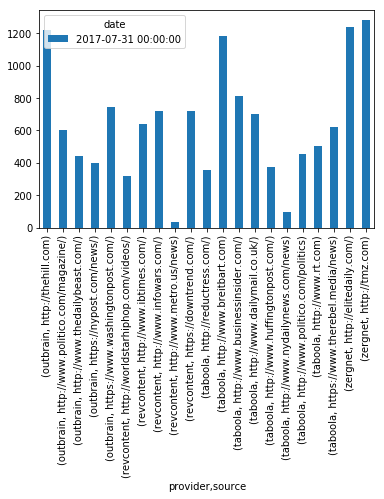

In [42]:
plt.show()

In [43]:
deduped['2017-06-01':'2017-06-30'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

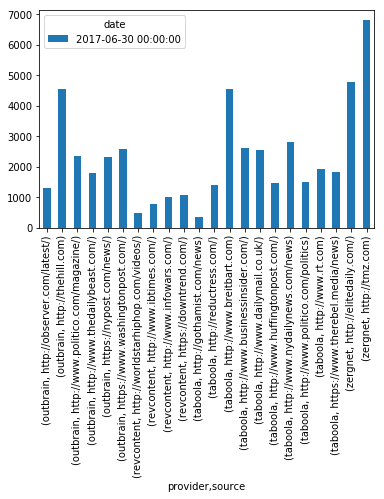

In [44]:
plt.show()

In [45]:
deduped['2017-05-01':'2017-05-31'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

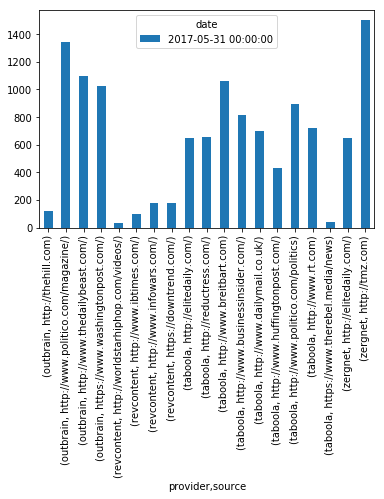

In [46]:
plt.show()

In [47]:
deduped['2017-04-01':'2017-04-30'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

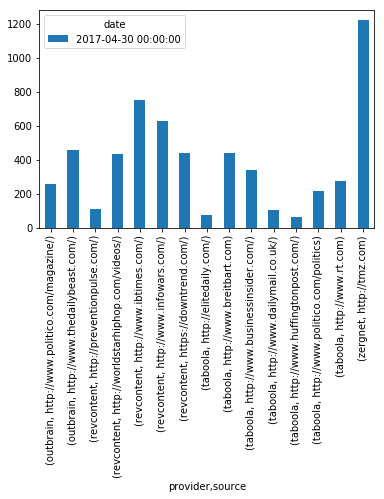

In [48]:
plt.show()

In [49]:
deduped['2017-03-27':'2017-03-31'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

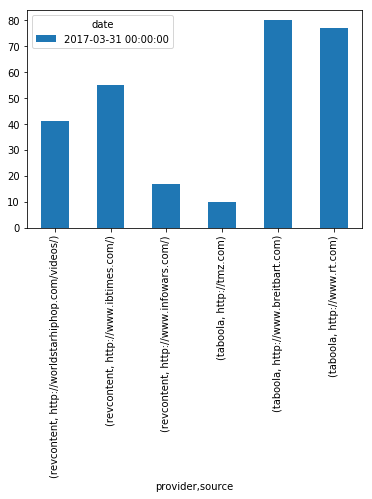

In [50]:
plt.show()

In [63]:
(deduped['2017-07-04':'2017-07-04'])['headline'].value_counts().nlargest(10)

Triple Your Accuracy With This Weird Shooting Technique Used By Seal Snipers    20
Here’s Why Guys Are Obsessed With This Underwear…                               16
24 Times Lotto Winner: This Method Will Make You Win the Lotto Consistently     13
Don't Buy Furniture Until You See This Site                                     13
Steven Tyler's Car Is Far From What You'd Expect                                12
27 Stars Who Died And Not a Word Was Said                                       10
18 Stars Who Have Lost It All and Now Work At Normal Jobs                       10
Born Before 1969? You Could Get an Extra $2,194 Monthly with This               10
1 Odd Method Restores Eyes To 20/20 Vision (Try It Tonight)                     10
28 Pictures That Show How Crazy Woodstock 1969 Was                              10
Name: headline, dtype: int64